### Data preprocessing, creating dummies and descriptions of the dataset, outlier manual inspection, train_test dataset split

In [2]:
#Importing the required packages for the assignment.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import IsolationForest 
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
import lightgbm as lgb
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### Import and initial inspection

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.shape # 17 predictive variables and total of 12330 observations

(12330, 18)

In [5]:
#Transforming Weekend and Revenue bool values into binary 0,1 categories for correct interpreation in Algorithms. 1=True
df['Weekend'] = df['Weekend'].astype('uint8')
df['Revenue'] = df['Revenue'].astype('uint8')

### Manually inspecting data patterns

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Na

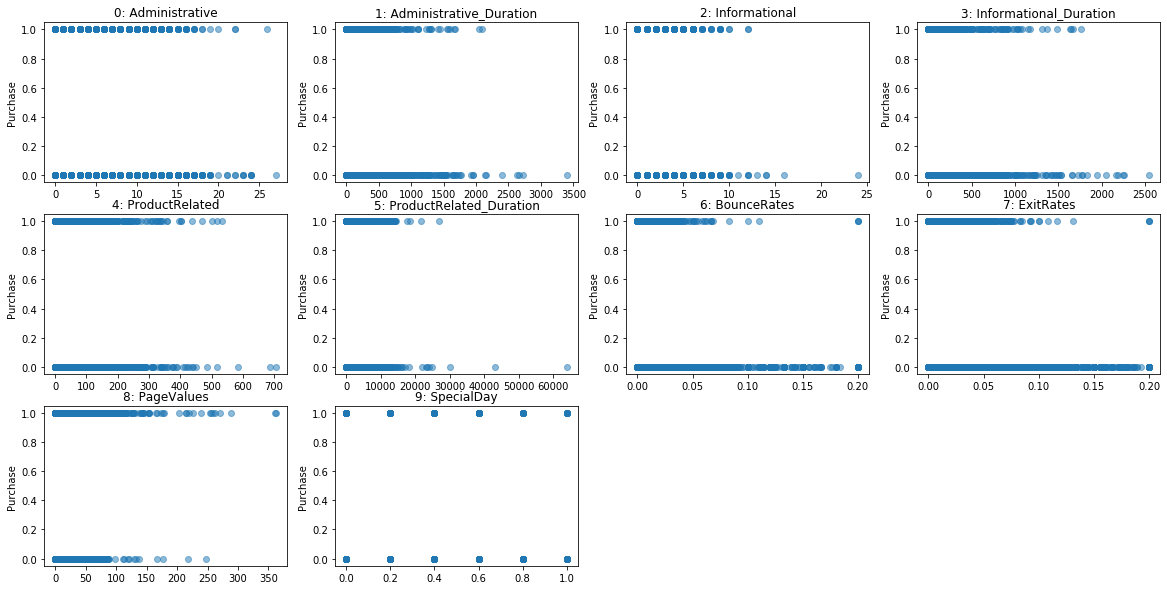

In [6]:
#Manually inspecting data patterns
print(df.Revenue.value_counts())
print(df.Weekend.value_counts())
print(df.VisitorType.value_counts())
print(df.TrafficType.value_counts())
print(df.Region.value_counts())
print(df.Browser.value_counts())
print(df.OperatingSystems.value_counts())
print(df.Month.value_counts())
print(df[["Administrative", "Administrative_Duration", "Informational","Informational_Duration", "ProductRelated",
   "ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]].describe().T[['count', 'mean', 'std', 'min', 'max']])

#Simple visualisatons of the dataset
visy=df['Revenue']
visx=df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    ax.plot(visx.iloc[:, i], visy.iloc[:], 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, df.columns[i]))
    ax.set_ylabel("Purchase")

The dataset is significantly unbalanced with majority of user sessions not ending with a purchase (84.52% - benchmark). The Revenue has indeed only two categories corresponding to dataset description. VisitorType has the majority of Returning Customers. However, we also have a category ('Other') that is represented with 85 observations, which, based on the variable name, could indicate that it was difficult to categorize these clients under a certain category. TrafficType seems to have a couple of categories that are represented with only a single observation, which could potentially indicate outliers. Similar situation is observed with the variables of Browser and OperatingSystems with some categories being represented just by a couple of the observations, while other categories having a way larger number of observations. Furthermore, we can observe some seasonal effect with most of the session taking place at the certain months (summer months seem very inactive as well as months like February or October).

### Creating dummies variables for our categorical variables

In [7]:
df_1 = pd.get_dummies(df, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'])
df_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
#Splitting the dataset into features and target variable" Revenue
test_variable = df_1['Revenue'].tolist()
target_variables = df_1.drop(columns=['Revenue'])

### Partition into training and test sets. Validating partition using t-test for difference in means

In [9]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(target_variables, test_variable, random_state=0)

In [10]:
type(X_train)

pandas.core.frame.DataFrame

### Trying to find the outliers using unsupervised outlier Detection Method - Isolation Forest

In [11]:
#Contamination will be default as we do not know what percentage of outliers we would expect
from sklearn.ensemble import IsolationForest 
X_train_df = pd.DataFrame(X_train)

model = IsolationForest(n_estimators=1000, random_state=0)
model.fit(X_train_df)

IsolationForest(n_estimators=1000, random_state=0)

In [12]:
X_train_df["IsolationForest Outliers"] = pd.Series(model.predict(X_train_df)) #-1 outlier, 1 - nomrla data
X_train_df["IsolationForest Outliers"].value_counts()

 1.0    6910
-1.0      15
Name: IsolationForest Outliers, dtype: int64

Only 0.2% of the observations are categorized as outliers, iForest is only sensitive to global outliers, and is weak in dealing with local outliers. Decision: We would not proceed with the removing of the outliers from the dataset as their porportions is few, while we do not want to remove data as available trianing data is not that large and perhaps these 0.2% represent some important trend. Furthermore later on we will apply MinMaxScaler to noramlzie data, which should dimiish the effect of the outliers.

### Feature Extraction. Identifying 15 most important features for predicition using Random Forest.

In original report random forest was the best model, hence we use it to identify the most important predicttors.

In [17]:
#Redoing data split to avoid errors
X_train, X_test, y_train, y_test = train_test_split(target_variables, test_variable, random_state=0)

In [18]:
#Random Forest
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

PageValues                 0.313968
ProductRelated_Duration    0.084132
ExitRates                  0.077333
ProductRelated             0.070976
Administrative_Duration    0.056109
BounceRates                0.055486
Administrative             0.043552
Informational_Duration     0.026052
Month_Nov                  0.019850
Informational              0.019038
Region_1                   0.011383
Weekend                    0.010688
TrafficType_2              0.010123
Browser_2                  0.009507
Region_3                   0.009402
dtype: float64


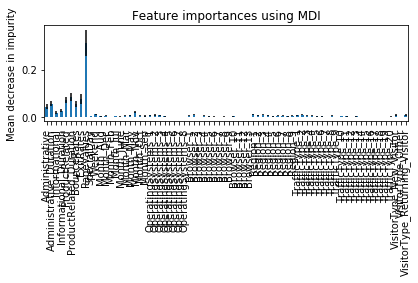

In [19]:
feature_names = X_train.columns

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
print(forest_importances.nlargest(n=15))


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



PageValues is clearly the most important variable (0.314), followed by other closely-scored features. However, even for the 15 th most important feature we see a very small score [Region_3 (0.009402)], suggesting that many variables do not have relevant weigth for our model.

### Creating polynomial features
To increase model complexity we would create polynomial features for the 15 most important predictors that were identified by the random forest. Then using random forest on the new dataset with polyonials we will reidentify the most important features to see whether polyinomial features will add prediciton effects.

In [20]:
### Creating polynomial features
poly_list=forest_importances.nlargest(n=15).index.to_list()

from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=3) #up till x^3
X_train_poly = trans.fit_transform(X_train[poly_list])
X_test_poly = trans.fit_transform(X_test[poly_list])
list_poly_features = trans.get_feature_names_out(poly_list)
X_train_poly = pd.DataFrame(X_train_poly, columns=list_poly_features)
X_test_poly = pd.DataFrame(X_test_poly, columns=list_poly_features)
X_train_poly

,1,PageValues,ProductRelated_Duration,ExitRates,ProductRelated,Administrative_Duration,BounceRates,Administrative,Informational_Duration,Month_Nov,...,TrafficType_2^3,TrafficType_2^2 Browser_2,TrafficType_2^2 Region_3,TrafficType_2 Browser_2^2,TrafficType_2 Browser_2 Region_3,TrafficType_2 Region_3^2,Browser_2^3,Browser_2^2 Region_3,Browser_2 Region_3^2,Region_3^3
0,1.0,0.000000,2622.600281,0.028520,99.0,0.000000,0.022000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.000000,1529.304670,0.009150,28.0,993.000000,0.001481,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,4.667079,3214.020563,0.007724,82.0,0.000000,0.000000,0.0,81.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,546.958333,0.033846,13.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.000000,0.000000,0.200000,2.0,0.000000,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,1.0,0.000000,549.916667,0.008163,50.0,4.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9243,1.0,0.000000,691.000000,0.080000,5.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9244,1.0,3.651726,8217.678753,0.013669,202.0,331.983333,0.001905,13.0,128.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9245,1.0,0.000000,338.583333,0.008696,23.0,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Feature Extraction. Identifying 100 most important features for predicition using Random Forest after creating polynomial features

In [21]:
rf_poly = RandomForestClassifier(random_state = 0)
rf_poly.fit(X_train_poly, y_train)
y_pred_rf_poly = rf_poly.predict(X_test_poly)

In [22]:
feature_names = X_train_poly.columns

importances = rf_poly.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_poly.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
print(forest_importances.nlargest(n=100))

PageValues ProductRelated_Duration                    0.032164
PageValues^2 ExitRates                                0.029024
PageValues ProductRelated                             0.025378
PageValues^2 ProductRelated                           0.021577
PageValues ProductRelated^2                           0.021554
                                                        ...   
ExitRates ProductRelated Browser_2                    0.002311
ProductRelated_Duration BounceRates Administrative    0.002306
ProductRelated BounceRates^2                          0.002271
ProductRelated_Duration ProductRelated Month_Nov      0.002233
ExitRates Administrative_Duration                     0.002214
Length: 100, dtype: float64


### Interpretation
Similarly to the analysis on dataset without polynomial features PageValues is the most important predictive features of identifying whether the customer will make a purchase or not.

### Creating new Training and Test consisting of 100 most important polynomial features

In [23]:
poly_list_1=forest_importances.nlargest(n=100).index.to_list()

In [24]:
#Redefyning X_train and X_test
X_train_1 = X_train_poly[poly_list_1]
X_test_1 = X_test_poly[poly_list_1]

### Initial Trial of ClassificationModels without data transformation for the benchmark comparison 
### Original Features vs Polynomial Features

### Knn

In [25]:
#Knn on original data
param_grid_knn = {'n_neighbors': range(1, 30, 4)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)
print(grid_knn.score(X_test, y_test))

y_pred_knn_0 = grid_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_knn_0))

{'n_neighbors': 13}
0.8478754459941615
              precision    recall  f1-score   support

           0   0.852089  0.988277  0.915144      2559
           1   0.739130  0.162214  0.266041       524

    accuracy                       0.847875      3083
   macro avg   0.795610  0.575245  0.590592      3083
weighted avg   0.832890  0.847875  0.804819      3083

[[2529   30]
 [ 439   85]]


In [26]:
#Knn on polynomial features data
param_grid_knn = {'n_neighbors': range(1, 30, 4)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

grid_knn.fit(X_train_1, y_train)
print(grid_knn.best_params_)
print(grid_knn.score(X_test_1, y_test))

y_pred_knn_0 = grid_knn.predict(X_test_1)

print(classification_report(y_test, y_pred_knn_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_knn_0))

{'n_neighbors': 5}
0.8553357119688615
              precision    recall  f1-score   support

           0   0.876380  0.961313  0.916884      2559
           1   0.641304  0.337786  0.442500       524

    accuracy                       0.855336      3083
   macro avg   0.758842  0.649550  0.679692      3083
weighted avg   0.836426  0.855336  0.836256      3083

[[2460   99]
 [ 347  177]]


##### Comment
We observe a better performance measured in F1 score on polynomial features dataset

### Logreg

In [27]:
#Logreg based on the original data
param_grid_logreg = {'C': np.linspace(0.1, 1, 6)} #Based on Runnning Time
grid_logreg = GridSearchCV(LogisticRegression(max_iter=100000, dual=False), param_grid_logreg, cv=5)

grid_logreg.fit(X_train, y_train)
print(grid_logreg.best_params_)
print(grid_logreg.score(X_test, y_test))
y_pred_logreg_0 = grid_logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_logreg_0))

{'C': 0.64}
0.8709049626986701
              precision    recall  f1-score   support

           0   0.883564  0.972646  0.925967      2559
           1   0.736842  0.374046  0.496203       524

    accuracy                       0.870905      3083
   macro avg   0.810203  0.673346  0.711085      3083
weighted avg   0.858627  0.870905  0.852923      3083

[[2489   70]
 [ 328  196]]


In [28]:
#Logreg on the polynomial features
param_grid_logreg = {'C': np.linspace(0.1, 1, 6)} #Based on Runnning Time
grid_logreg = GridSearchCV(LogisticRegression(max_iter=100000000, dual=False), param_grid_logreg, cv=5)

grid_logreg.fit(X_train_1, y_train)
print(grid_logreg.best_params_)
print(grid_logreg.score(X_test_1, y_test))
y_pred_logreg_0 = grid_logreg.predict(X_test_1)

print(classification_report(y_test, y_pred_logreg_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_logreg_0))

/Users/Daniel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Daniel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

{'C': 0.1}
0.8751216347713267
              precision    recall  f1-score   support

           0   0.888214  0.971864  0.928158      2559
           1   0.745583  0.402672  0.522924       524

    accuracy                       0.875122      3083
   macro avg   0.816899  0.687268  0.725541      3083
weighted avg   0.863972  0.875122  0.859283      3083

[[2487   72]
 [ 313  211]]


##### Comment
We observe a better performance measured in F1 score on polynomial features dataset

### SVM

In [29]:
#SVM on original data
param_grid_svc = {'C': np.linspace(1, 10, 6)}
grid_svc = GridSearchCV(LinearSVC(max_iter=1000, dual=False), param_grid_svc, cv=5)

grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)
print(grid_svc.score(X_test, y_test))
y_pred_svm_0 = grid_svc.predict(X_test)

print(classification_report(y_test, y_pred_svm_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_svm_0))

{'C': 4.6}
0.8657152124554006
              precision    recall  f1-score   support

           0   0.874346  0.978898  0.923673      2559
           1   0.752294  0.312977  0.442049       524

    accuracy                       0.865715      3083
   macro avg   0.813320  0.645938  0.682861      3083
weighted avg   0.853601  0.865715  0.841814      3083

[[2505   54]
 [ 360  164]]


In [30]:
#SVM on polynomial data
param_grid_svc = {'C': np.linspace(1, 10, 6)}
grid_svc = GridSearchCV(LinearSVC(max_iter=1000, dual=False), param_grid_svc, cv=5)

grid_svc.fit(X_train_1, y_train)
print(grid_svc.best_params_)
print(grid_svc.score(X_test_1, y_test))
y_pred_svm_0 = grid_svc.predict(X_test_1)

print(classification_report(y_test, y_pred_svm_0, labels=[0, 1], digits=6))
print(confusion_matrix(y_test, y_pred_svm_0))

{'C': 4.6}
0.8773921505027571
              precision    recall  f1-score   support

           0   0.890720  0.971473  0.929346      2559
           1   0.750000  0.417939  0.536765       524

    accuracy                       0.877392      3083
   macro avg   0.820360  0.694706  0.733055      3083
weighted avg   0.866803  0.877392  0.862621      3083

[[2486   73]
 [ 305  219]]


##### Comment
We observe a better performance for SVM as well measured in F1 score on polynomial features dataset

### Random Forest

In [31]:
#Random forest on original data
grid_rf = {'max_features': np.arange(1,15)} 
grid2 = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = grid_rf, cv=5)
grid2.fit(X_train, y_train) 

print(grid2.best_params_)
print(grid2.score(X_test, y_test))
y_pred_rf = grid2.predict(X_test)

print(classification_report(y_test, y_pred_rf, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_rf)


{'max_features': 14}
0.8910152448913397
              precision    recall  f1-score   support

           0   0.912737  0.960531  0.936024      2559
           1   0.741026  0.551527  0.632385       524

    accuracy                       0.891015      3083
   macro avg   0.826881  0.756029  0.784205      3083
weighted avg   0.883552  0.891015  0.884417      3083



array([[2458,  101],
       [ 235,  289]])

In [32]:
#Random forest on polynomial data
grid_rf = {'max_features': np.arange(1,15)} 
grid2 = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = grid_rf, cv=5)
grid2.fit(X_train_1, y_train) 

print(grid2.best_params_)
print(grid2.score(X_test_1, y_test))
y_pred_rf = grid2.predict(X_test_1)

print(classification_report(y_test, y_pred_rf, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_rf)


{'max_features': 4}
0.8955562763542004
              precision    recall  f1-score   support

           0   0.919700  0.957796  0.938361      2559
           1   0.741627  0.591603  0.658174       524

    accuracy                       0.895556      3083
   macro avg   0.830663  0.774700  0.798268      3083
weighted avg   0.889434  0.895556  0.890740      3083



array([[2451,  108],
       [ 214,  310]])

##### Comment
We observe a better performance measured in F1 score on polynomial features dataset for Random Forest having common trend among all models

### Dealing with the DataImbalcne and prerforming data transformation using MinMaxScaler


### Knn

In [33]:
#Original data
knn_pipe_mm_en_o = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     KNeighborsClassifier())

param_grid_mm_en_o = {'kneighborsclassifier__n_neighbors': range(1, 30, 4)}
grid_knn_mm_en_o = GridSearchCV(knn_pipe_mm_en_o, param_grid_mm_en_o, cv=5)

grid_knn_mm_en_o.fit(X_train, y_train)

print(grid_knn_mm_en_o.best_params_)
print(grid_knn_mm_en_o.score(X_test, y_test))
y_pred_knn_mm_en_o = grid_knn_mm_en_o.predict(X_test)

print(classification_report(y_test, y_pred_knn_mm_en_o, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_knn_mm_en_o)

{'kneighborsclassifier__n_neighbors': 29}
0.8070061628284139
              precision    recall  f1-score   support

           0   0.867790  0.905432  0.886212      2559
           1   0.414044  0.326336  0.364995       524

    accuracy                       0.807006      3083
   macro avg   0.640917  0.615884  0.625603      3083
weighted avg   0.790670  0.807006  0.797623      3083



array([[2317,  242],
       [ 353,  171]])

In [34]:
#Polynomial data

knn_pipe_mm_en = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     KNeighborsClassifier())

param_grid_mm_en = {'kneighborsclassifier__n_neighbors': range(1, 30, 4)}
grid_knn_mm_en = GridSearchCV(knn_pipe_mm_en, param_grid_mm_en, cv=5)

grid_knn_mm_en.fit(X_train_1, y_train)

print(grid_knn_mm_en.best_params_)
print(grid_knn_mm_en.score(X_test_1, y_test))
y_pred_knn_mm_en = grid_knn_mm_en.predict(X_test_1)

print(classification_report(y_test, y_pred_knn_mm_en, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_knn_mm_en)

{'kneighborsclassifier__n_neighbors': 21}
0.8692831657476484
              precision    recall  f1-score   support

           0   0.932584  0.908167  0.920214      2559
           1   0.602369  0.679389  0.638565       524

    accuracy                       0.869283      3083
   macro avg   0.767477  0.793778  0.779389      3083
weighted avg   0.876459  0.869283  0.872344      3083



array([[2324,  235],
       [ 168,  356]])

### Logreg

In [35]:
#Original data
logreg_pipe_mm_en_o = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     LogisticRegression(max_iter=10000, dual=False))

param_grid_mm_en_1_o = {'logisticregression__C': np.linspace(100, 1000, 6)}
grid_logreg_mm_en_o = GridSearchCV(logreg_pipe_mm_en_o, param_grid_mm_en_1_o, cv=5)

grid_logreg_mm_en_o.fit(X_train, y_train)

print(grid_logreg_mm_en_o.best_params_)
print(grid_logreg_mm_en_o.score(X_test, y_test))
y_pred_logreg_mm_en_o = grid_logreg_mm_en_o.predict(X_test)

print(classification_report(y_test, y_pred_logreg_mm_en_o, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_logreg_mm_en_o)

{'logisticregression__C': 640.0}
0.8676613687966267
              precision    recall  f1-score   support

           0   0.921599  0.918718  0.920157      2559
           1   0.609023  0.618321  0.613636       524

    accuracy                       0.867661      3083
   macro avg   0.765311  0.768519  0.766896      3083
weighted avg   0.868472  0.867661  0.868059      3083



array([[2351,  208],
       [ 200,  324]])

In [36]:
#Polynomial data
#Logistic Regression
logreg_pipe_mm_en = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     LogisticRegression(max_iter=10000, dual=False))

param_grid_mm_en_1 = {'logisticregression__C': np.linspace(1, 100, 6)}
grid_logreg_mm_en = GridSearchCV(logreg_pipe_mm_en, param_grid_mm_en_1, cv=5)

grid_logreg_mm_en.fit(X_train_1, y_train)

print(grid_logreg_mm_en.best_params_)
print(grid_logreg_mm_en.score(X_test_1, y_test))
y_pred_logreg_mm_en = grid_logreg_mm_en.predict(X_test_1)

print(classification_report(y_test, y_pred_logreg_mm_en, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_logreg_mm_en)

{'logisticregression__C': 40.6}
0.8751216347713267
              precision    recall  f1-score   support

           0   0.941153  0.906213  0.923353      2559
           1   0.612278  0.723282  0.663167       524

    accuracy                       0.875122      3083
   macro avg   0.776715  0.814748  0.793260      3083
weighted avg   0.885256  0.875122  0.879130      3083



array([[2319,  240],
       [ 145,  379]])

### SVM

In [37]:
#Original data
svm_pipe_mm_en_o = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     LinearSVC(max_iter=10000, dual=False))

param_grid_mm_en_2_o = {'linearsvc__C': np.linspace(1, 1000, 6)}
grid_svm_mm_en_o = GridSearchCV(svm_pipe_mm_en_o, param_grid_mm_en_2_o, cv=5)

grid_svm_mm_en_o.fit(X_train, y_train)

print(grid_svm_mm_en_o.best_params_)
print(grid_svm_mm_en_o.score(X_test, y_test))
y_pred_svm_mm_en_o = grid_svm_mm_en_o.predict(X_test)

print(classification_report(y_test, y_pred_svm_mm_en_o, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_svm_mm_en_o)

{'linearsvc__C': 800.2}
0.8757703535517353
              precision    recall  f1-score   support

           0   0.917498  0.934349  0.925847      2559
           1   0.647799  0.589695  0.617383       524

    accuracy                       0.875770      3083
   macro avg   0.782648  0.762022  0.771615      3083
weighted avg   0.871659  0.875770  0.873419      3083



array([[2391,  168],
       [ 215,  309]])

In [38]:
#Polynomial data
#LinearSVC
svm_pipe_mm_en = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     LinearSVC(max_iter=10000, dual=False))

param_grid_mm_en_2 = {'linearsvc__C': np.linspace(1, 1000, 6)}
grid_svm_mm_en = GridSearchCV(svm_pipe_mm_en, param_grid_mm_en_2, cv=5)

grid_svm_mm_en.fit(X_train_1, y_train)

print(grid_svm_mm_en.best_params_)
print(grid_svm_mm_en.score(X_test_1, y_test))
y_pred_svm_mm_en = grid_svm_mm_en.predict(X_test_1)

print(classification_report(y_test, y_pred_svm_mm_en, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_svm_mm_en)

{'linearsvc__C': 400.6}
0.8725267596496918
              precision    recall  f1-score   support

           0   0.944947  0.898789  0.921290      2559
           1   0.600924  0.744275  0.664962       524

    accuracy                       0.872527      3083
   macro avg   0.772936  0.821532  0.793126      3083
weighted avg   0.886475  0.872527  0.877723      3083



array([[2300,  259],
       [ 134,  390]])

### Random Forest

In [39]:
#Original data
rf_pipe_mm_en_o = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     RandomForestClassifier(random_state = 0, max_features=6))

param_grid_mm_en_4_o = {'randomforestclassifier__max_depth': [6,7,8]}
grid_rf_mm_en_oo = GridSearchCV(rf_pipe_mm_en_o, param_grid_mm_en_4_o, cv=5)

grid_rf_mm_en_oo.fit(X_train, y_train)

print(grid_rf_mm_en_oo.best_params_)
print(grid_rf_mm_en_oo.score(X_test, y_test))
y_pred_rf_mm_en_oo = grid_rf_mm_en_oo.predict(X_test)

print(classification_report(y_test, y_pred_rf_mm_en_oo, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_rf_mm_en_oo)

{'randomforestclassifier__max_depth': 8}
0.8835549789166396
              precision    recall  f1-score   support

           0   0.925367  0.935131  0.930224      2559
           1   0.665996  0.631679  0.648384       524

    accuracy                       0.883555      3083
   macro avg   0.795682  0.783405  0.789304      3083
weighted avg   0.881283  0.883555  0.882321      3083



array([[2393,  166],
       [ 193,  331]])

In [40]:
#Polynomial data
#Random Forest
rf_pipe_mm_en = make_pipeline(MinMaxScaler(),
    EditedNearestNeighbours(n_neighbors=5),
     RandomForestClassifier(random_state = 0, max_features=4))

param_grid_mm_en_4 = {'randomforestclassifier__max_depth': [6,7,8]}
grid_rf_mm_en = GridSearchCV(rf_pipe_mm_en, param_grid_mm_en_4, cv=5)

grid_rf_mm_en.fit(X_train_1, y_train)

print(grid_rf_mm_en.best_params_)
print(grid_rf_mm_en.score(X_test_1, y_test))
y_pred_rf_mm_en = grid_rf_mm_en.predict(X_test_1)

print(classification_report(y_test, y_pred_rf_mm_en, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_rf_mm_en)

{'randomforestclassifier__max_depth': 7}
0.8744729159909179
              precision    recall  f1-score   support

           0   0.954013  0.891755  0.921834      2559
           1   0.599132  0.790076  0.681481       524

    accuracy                       0.874473      3083
   macro avg   0.776573  0.840915  0.801658      3083
weighted avg   0.893696  0.874473  0.880983      3083



array([[2282,  277],
       [ 110,  414]])

### Trying additional models - LGBM and MLP classifier

### LGBM
Can not do gridsearch due to too high computation cost (Kernel dies) - through we might expect it to perofrm even better, this is a limitation of our future and should be a further direction for future work.

In [41]:
#On original dataset
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier(random_state=0, class_weight='balanced')
clf_lgb.fit(X_train, y_train)
y_pred_clf_lgb = clf_lgb.predict(X_test)

print(classification_report(y_test, y_pred_clf_lgb, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_clf_lgb)



              precision    recall  f1-score   support

           0   0.950499  0.892927  0.920814      2559
           1   0.596465  0.772901  0.673317       524

    accuracy                       0.872527      3083
   macro avg   0.773482  0.832914  0.797065      3083
weighted avg   0.890326  0.872527  0.878748      3083



array([[2285,  274],
       [ 119,  405]])

In [42]:
# On Plynomial Dataset
clf_lgb = lgb.LGBMClassifier(random_state=0, class_weight='balanced')
clf_lgb.fit(X_train_1, y_train)
y_pred_clf_lgb = clf_lgb.predict(X_test_1)

print(classification_report(y_test, y_pred_clf_lgb, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_clf_lgb)

              precision    recall  f1-score   support

           0   0.943673  0.903478  0.923138      2559
           1   0.609795  0.736641  0.667243       524

    accuracy                       0.875122      3083
   macro avg   0.776734  0.820060  0.795191      3083
weighted avg   0.886926  0.875122  0.879645      3083



array([[2312,  247],
       [ 138,  386]])

##### Comments:
In terms of F1 score performs close to Random Forest, however performance on the original features for LGBM is better than on polynomial features.

### MLP Classifier

No dealing with unbalanced data and not applying normalization becuase of computatinal costs. Future research should consider tuning this model to extend the sucess of original paper work on analyzed dataset.

In [43]:
#On the polynomial features

param_grid_mm_en_mlp = {'alpha': np.linspace(700, 800, 10)}
grid_mlp_mm_en = GridSearchCV(MLPClassifier(random_state=0, max_iter=1000), param_grid_mm_en_mlp, cv=5)

grid_mlp_mm_en.fit(X_train_1, y_train)

print(grid_mlp_mm_en.best_params_)
print(grid_mlp_mm_en.score(X_test_1, y_test))
y_pred_mlp = grid_mlp_mm_en.predict(X_test_1)

print(classification_report(y_test, y_pred_mlp, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_mlp)

{'alpha': 722.2222222222222}
0.6162828413882582
              precision    recall  f1-score   support

           0   0.900466  0.604533  0.723404      2559
           1   0.258608  0.673664  0.373743       524

    accuracy                       0.616283      3083
   macro avg   0.579537  0.639099  0.548573      3083
weighted avg   0.791373  0.616283  0.663974      3083



array([[1547, 1012],
       [ 171,  353]])

In [44]:
#On the original features

param_grid_mm_en_mlp_or = {'alpha': np.linspace(0.001, 2, 10)}
grid_mlp_mm_en_or = GridSearchCV(MLPClassifier(random_state=0, max_iter=1000), param_grid_mm_en_mlp_or, cv=5)

grid_mlp_mm_en_or.fit(X_train, y_train)

print(grid_mlp_mm_en_or.best_params_)
print(grid_mlp_mm_en_or.score(X_test, y_test))
y_pred_mlp_or = grid_mlp_mm_en_or.predict(X_test)

print(classification_report(y_test, y_pred_mlp_or, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_mlp_or)

{'alpha': 1.1115555555555554}
0.785598443074927
              precision    recall  f1-score   support

           0   0.952767  0.780383  0.858002      2559
           1   0.430598  0.811069  0.562541       524

    accuracy                       0.785598      3083
   macro avg   0.691682  0.795726  0.710272      3083
weighted avg   0.864017  0.785598  0.807784      3083



array([[1997,  562],
       [  99,  425]])